# Section examples

The `xarray.interp` method makes it easy to extract a ROMS Dataset along a verical section.
The functionality is implemented in the function `section` in the `xroms` package.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cmocean.cm as cmo
import xroms
#%matplotlib notebook
%matplotlib inline

In [2]:
# Initiate the Dataset
A = xroms.roms_dataset("ocean_avg_0014.nc")

Define a linear section by the grid coordinates of the two end points.
For a quick check, draw it in a map

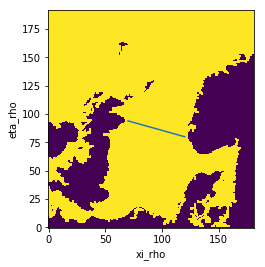

In [3]:
# Define a linear section, draw in map for quick control

# First and last end point
x0, y0 = 70,  94
x1, y1 = 120, 80
Npoints = 50
X = np.linspace(x0, x1, Npoints)
Y = np.linspace(y0, y1, Npoints)

# Plot
A.mask_rho.plot(add_colorbar=False)
plt.plot(X, Y)
plt.axis('image');

Make a section Dataset

In [4]:
B = xroms.section(A, X, Y)

Plot the vertical profile

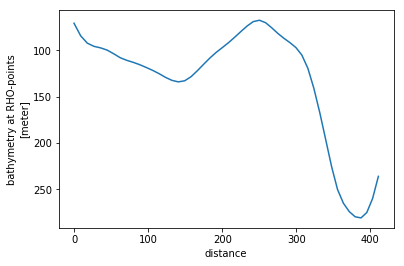

In [5]:
# Plot depth along section
B.h.plot(yincrease=False);

It is easy to plot a 3D field along the section in s-coordinates

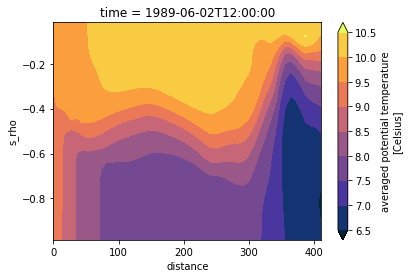

In [6]:
# Plot temperature in s-coordinates
T = B.temp.isel(time=3)
levels = np.arange(6.5, 11, 0.5)
T.plot.contourf(levels=levels, cmap=cmo.thermal);

Using the `z_rho` coordinate, the section can be plotted in z-coordinates.
This does not work with the `plot` method, but works nicely if `contourf` or
`pcolormesh` is indicated directly.

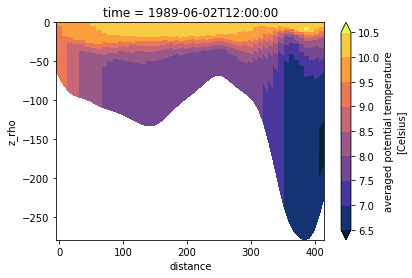

In [7]:
# T.plot.contourf('distance', 'z_rho', levels=levels, cmap=cmo.thermal)
T.plot.pcolormesh('distance', 'z_rho', levels=levels, cmap=cmo.thermal)

Make a similar plot of salinity. I prefer to reverse the `haline` colour map,
to have the darker colours at high salinity.

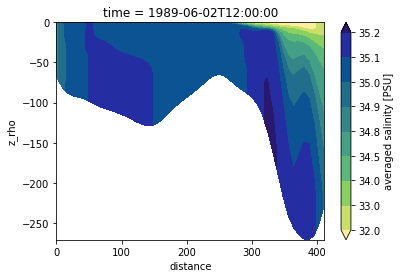

In [8]:
S = B.salt.isel(time=3)
levels = [32, 33, 34, 34.5, 34.8, 34.9, 35.0, 35.1, 35.2]
S.plot.contourf('distance', 'z_rho', levels=levels, cmap=cmo.haline_r)

The section Dataset has a DataArray with the normal velocity. A diverging colour map is used. 

The conventions are that the section is plotted from left to right and a positive velocity points into the screen.

/opt/anaconda/lib/python3.6/site-packages/seaborn/apionly.py:6: UserWarning: As seaborn no longer sets a default style on import, the seaborn.apionly module is deprecated. It will be removed in a future version.
  warnings.warn(msg, UserWarning)


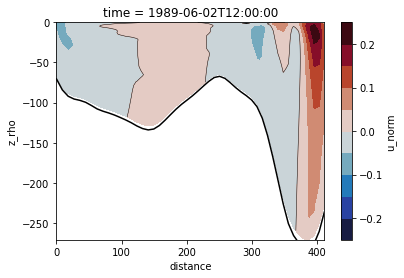

In [9]:
U = B.isel(time=3).u_norm
levels=np.arange(-0.25, 0.3, 0.05)
U.plot.contourf('distance', 'z_rho', levels=levels, cmap=cmo.balance)
# Add the zero velocity contour
U.plot.contour('distance', 'z_rho', levels=[0], colors='black', linewidths=0.5)
# Add the bottom profile
plt.plot(B.distance, -B.h, color='black');

The Fedje–Shetland section goes approximately from 1°W to 4°57'E along the parallel 60°N.

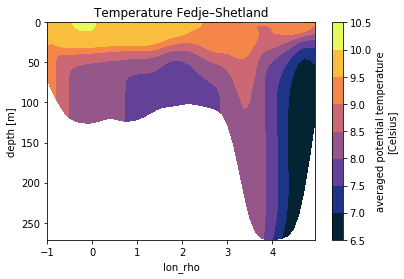

In [10]:
lon0, lat0 = -1, 60
lon1, lat1 = 4 + 57/60, 60
# Take 50 equidistant points along the section
lon = np.linspace(lon0, lon1, 50)
lat = np.linspace(lat0, lat1, 50)
# Transform to grid coordinates
X, Y = xroms.ll2xy(A, lon, lat)
# Take the section Dataset
S = xroms.section(A, X, Y)
# Add a depth coordinate
S['depth'] = -S.z_rho
S['depth'].attrs = {'units': 'm'}

# Plot temperature, using longitude as horizontal coordinate
temp = S.isel(time=3).temp
levels = np.arange(6.5, 11, 0.5)
temp.plot.contourf('lon_rho', 'depth', levels=levels,
                   cmap=cmo.thermal, yincrease=False)
plt.title("Temperature Fedje–Shetland");